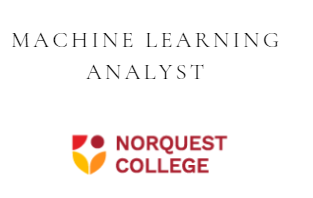

# Modelling

Predicting the **number of donation bags collected, Time spent and Comment Sentiments** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

# **Model 1: Donation Prediction**


In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset for the year 2023
data = pd.read_csv('Cleaned_Proposed_Data_Collection.csv')
data.head()

In [ ]:
# Checking the information regarding the data
data.info()

In [ ]:
# Loading the dataset for the year 2024
data_1 = pd.read_csv('Cleaned_food_drive_data.csv')
data_1.head()

In [ ]:
# Checking the information regarding the data
data_1.info()

In [ ]:
# Create a feature matrix X and target variable y
X = data[['Completed More Than One Route', 'Routes Completed', 'Time Spent', '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers', 'Donation Bags Collected']]
y = data_1['Donation Bags Collected for the year 2024']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Converting the Categorical data into numerical data ("Yes": 1, "No": 0)
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route'])

In [ ]:
# Fit a regression model to predict the number of donation bags
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predict donation bags on the test set
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# **Compare with other Regressor Models**

In [ ]:
#Importing the Libraries for the various models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)  # Adjusting the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=5)  # Adjusting the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # Adjusting the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # Adjusting hyperparameters
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [ ]:
# Calculating the mean-squared error and the R-squared value for the different models
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

**Which model performed best?**

Answer: Random forest model performs the best among all models deployed.

# **Save the best performing model**

In [ ]:
# Importing the joblib package
!pip install joblib

In [ ]:
import joblib

# 'random_forest' is best trained Random Forest Regressor model
model = random_forest # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


# **Determine Feature Imporance- Regression Models**

In [ ]:
# 'decision_tree' is trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()

In [ ]:
# 'random_forest' is trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()


In [ ]:
# 'gradient_boosting' is trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()


# **Solution 2: Convert to a Classification Problem**

To do this we can set a threshold for the number of bags collected to determine whether a donation drive is considered successful or not. This threshold can be used to convert your regression task (predicting the number of bags collected) into a classification task (predicting whether the threshold was met or not).

In [ ]:
# Setting the threshold for the donation bags
threshold = 25 # In this case the Threshold is 25 bags
data_1['Success'] = (data_1['Donation Bags Collected for the year 2024'] >= threshold).astype(int)

# **Check for Data imbalance**

In [ ]:
import matplotlib.pyplot as plt

# Calculating value counts for the 'Success' column
success_counts = data_1['Success'].value_counts()

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Importing the libraries for the various models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Assigning the target variable in a column named 'Success' (1 for success, 0 for failure)
X = data[['Completed More Than One Route','Routes Completed','Time Spent', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent', 'Donation Bags Collected']]
y = data_1['Success']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Converting the Categorical data into numerical data ("Yes": 1, "No": 0)
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route'])

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Compare Models**

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # Adjusting the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # Adjusting the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # Adjusting the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for KNN
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

**Which model performed best?**

Answer: Random forest model performs the best among all models.

# **Save the best performing model**

In [ ]:
# 'random_forest_classifier' is your best trained Random Forest Classifier model
model = random_forest  # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)

# **Determine Feature Importance- Classification Models**

Decision Tree

In [ ]:
#'decision_tree' is trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns[:len(feature_importance)]

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


Random Forest

In [ ]:
#'random_forest' is trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns[:len(feature_importance)]

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Gradient Boost

In [ ]:
#'gradient_boosting' is trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns[:len(feature_importance)]

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()


# **Model 2: Time Spent For Collecting Donation Bags**

In [ ]:
# Counting the value of the time spent ranges in the data
data_1['Time Spent Collecting Donations'].value_counts()

In [ ]:
# Mapping the categorical data into the numerical data for the year 2024
data_1['Time Spent Collecting Donations'] = data_1['Time Spent Collecting Donations'].map({'30 - 60 Minutes':1,
                                               '1 Hour - 1.5 Hours': 2,
                                               '0 - 30 Minutes': 0,
                                               '2+ Hours': 3})
data_1['Time Spent Collecting Donations']

In [ ]:
# Creating a feature matrix X and target variable y
X = data[['Ward/Branch', 'Completed More Than One Route', 'Completed More Than One Route', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent']]
y = data_1['Time Spent Collecting Donations']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
duplicate_columns = X_train.columns[X_train.columns.duplicated()]

# Removing the Duplicate Columns, if there is any in the dataset
if duplicate_columns.any():
    X_train = X_train.loc[:, ~X_train.columns.duplicated()]
    X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [ ]:
# Counting the value in the data of every single ward
X_train['Ward/Branch'].value_counts()

In [ ]:
# Mapping the categorical data of every single ward into numerical data
data['Ward/Branch'] = data['Ward/Branch'].map({'Silver Berry Ward': 0,
                                               'Crawford Plains Ward': 1,
                                               'Lee Ridge Ward': 2,
                                               'Griesbach Ward': 3,
                                               'Londonderry Ward':4,
                                               'Ellerslie Ward':5,
                                               'Blackmud Creek Ward':6,
                                               'Clareview Ward':7,
                                               'Rutherford Ward':8,
                                               'Southgate Ward':9,
                                               'Forest Heights Ward':10,
                                               'Rabbit Hill Ward':11,
                                               'Greenfield Ward':12,
                                               'Terwillegar Park Ward':13,
                                               'Namao Ward':14,
                                               'Woodbend Ward':15,
                                               'Connors Hill Ward':16,
                                               'Stony Plain Ward':17,
                                               'Strathcona Married Student Ward':18,
                                               'Rio Vista Ward':19,
                                               'Beaumont Ward':20,
                                               'Wild Rose Ward':21,
                                               'Drayton Valley Ward':22,
                                               'Wainwright Branch':23,
                                               'Lago Lindo Branch':24,
                                               'Pioneer Ward':25})
data['Ward/Branch'] = data['Ward/Branch']
data.head()

In [ ]:
# Changing the datatype of the Ward/Branch
X_train['Ward/Branch'] = pd.to_numeric(X_train['Ward/Branch'], errors='coerce')
X_test['Ward/Branch'] = pd.to_numeric(X_test['Ward/Branch'], errors='coerce')

In [ ]:
# Training data to both learing the encoding and apply it.
X_train['Ward/Branch'] = le.fit_transform(X_train['Ward/Branch'])
# Transforming the test data to apply the same encoding, ensuring consistency between train and test sets.
X_test['Ward/Branch'] = le.transform(X_test['Ward/Branch'])

In [ ]:
# Converting the Categorical data into numerical data ("Yes": 1, "No": 0)
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Creating a LabelEncoder instance
le = LabelEncoder()

# Fitting the encoder to the unique values in the 'Time Spent' column:
times_spent = y_train.unique()  # Get unique values from the 'Time Spent' column
le.fit(times_spent)

# Transforming the 'Time Spent' column in y_train to numerical values
y_train = le.transform(y_train)

In [ ]:
# Fitting a regression model to predict the time spent for collecting the donation bags
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predicting time spent on the test set
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Creating a DataFrame to compare the actual and predicted values side by side for evaluation
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# **Compare with other Regressor Models**

In [ ]:
# Importing the libraries for the various models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)  # Adjusting the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=5)  # Adjusting the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # Adjusting the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # Adjusting hyperparameters
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [ ]:
# Calculating the mean-squared error and the R-squared value for the different models
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

# **Save the best performing model**



In [ ]:
# Importing the joblib package
!pip install joblib

In [ ]:
import joblib

#'random_forest' is best trained Random Forest Regressor model
model = random_forest # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


# **Determine Feature Imporance- Regression Models**

In [ ]:
#'decision_tree' is trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()

In [ ]:
#'random_forest' is trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

In [ ]:
#'gradient_boosting' is trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()


# **Solution 2: Convert to a Classification Problem**

In [ ]:
# Setting the threshold for the Time Spent
threshold = 1.9
data_1['Success'] = (data_1['Time Spent Collecting Donations'] >= threshold).astype(int)

# **Check for Data imbalance**

In [ ]:
import matplotlib.pyplot as plt

# Calculating value counts for the 'Success' column
success_counts = data_1['Success'].value_counts()

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Installing pandas and scikit-learn libraries
!pip install pandas scikit-learn

In [ ]:
# Importing the libraries for the various models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [ ]:
# Assigning the target variable in a column named 'Success' (1 for success, 0 for failure)
X = data[['Ward/Branch','Completed More Than One Route', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent']]
y = data_1['Success']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting 'Completed More Than One Route' to numerical data using Label Encoding for both training and testing sets
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route']) # Apply transform to X_test as well

# Imputing the Mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Compare Models**

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # Adjusting the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # Adjusting the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # Adjusting the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for KNN
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Randon Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

# **Save the best performing model**

In [ ]:
#'random_forest_classifier' best trained Random Forest Classifier model
model = random_forest  # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


# **Determine Feature Importance- Classification Models**

In [ ]:
#'decision_tree' is trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
#'random_forest' is trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [ ]:
#'gradient_boosting' is trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()


# **Model 3: Comment Sentiments**

In [ ]:
# Create a feature matrix X and target variable y
X = data[['Ward/Branch', 'Completed More Than One Route', 'Routes Completed', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Comment Sentiments']]
y = data_1['Comment Sentiments for year 2024']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Converting 'Completed More Than One Route' to numerical data using Label Encoding for both training and testing sets
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route'])

In [ ]:
# Applying Label Encoding to categorical columns like 'Ward/Branch' and 'Comment Sentiments'
for col in ['Ward/Branch', 'Comment Sentiments']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [ ]:
# Calculating the value in the data of Comment Sentiments
data_1['Comment Sentiments for year 2024'].value_counts()

In [ ]:
# Mapping the categorical data of Comment Sentiments into numerical data
data_1['Comment Sentiments for year 2024'] = data_1['Comment Sentiments for year 2024'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

In [ ]:
# Converting the target variable to numerical representation using Label Encoding.
from sklearn.preprocessing import LabelEncoder

# Using Label Encoding for both training and testing sets
le = LabelEncoder()
y_train = le.fit_transform(y_train)# Mapping the categorical data of Comment Sentiments into numerical data
data_1['Comment Sentiments for year 2024'] = data_1['Comment Sentiments for year 2024'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})
y_test = le.transform(y_test)

# Fitting a regression model to predict comment sentiments
model = LinearRegression()
# Mapping the categorical data of Comment Sentiments into numerical data
data_1['Comment Sentiments for year 2024'] = data_1['Comment Sentiments for year 2024'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Rounding off the predicted y values
import numpy as np
y_pred_rounded = np.round(y_pred)
y_pred_rounded

# **Actual vs Predicted Values**

In [ ]:
import matplotlib.pyplot as plt

# Defining the y_test and y_pred_random_forest
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred_random_forest, label='Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Creating a DataFrame to compare the actual and predicted values side by side for evaluation
comparison_df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df_2)

In [ ]:
# y_pred contains predicted values and y_test contains true values
rounded_predictions = np.round(y_pred)
value_counts = pd.Series(rounded_predictions).value_counts()
value_counts

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# **Compare with other Regressor Models**

In [ ]:
# Importing the libraries for the various models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [ ]:
# Calculating the Mean-squared Error and R-squared value for the different models
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

# **Save the best performing model**

In [ ]:
# Installing the joblib package
!pip install joblib

In [ ]:
import joblib

# 'random_forest' is best trained Random Forest Regressor model
model = random_forest # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)

# **Determine Feature Imporance- Regression Models**

In [ ]:
# 'decision_tree' is trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()

In [ ]:
#'random_forest' is trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

In [ ]:
#'gradient_boosting' is trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()

# **Solution 2: Convert to a Classification Problem**

In [ ]:
# Setting the threshold for the Comment Sentiments
threshold = 1.2
data_1['Success'] = (data_1['Comment Sentiments for year 2024'] >= threshold).astype(int)

# **Check for Data imbalance**

In [ ]:
import matplotlib.pyplot as plt

# Calculating value counts for the 'Success' column
success_counts = data_1['Success'].value_counts()

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Importing the pandas and scikit-learn libraries
!pip install pandas scikit-learn

In [ ]:
#Importing the libraries for the various models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [ ]:
# Assigning the target variable in a column named 'Success' (1 for success, 0 for failure)
X = data[['Ward/Branch','Completed More Than One Route', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent', 'Comment Sentiments']]
y = data_1['Success']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'Completed More Than One Route' to numerical using Label Encoding for both training and testing sets
le = LabelEncoder()
X_train['Completed More Than One Route'] = le.fit_transform(X_train['Completed More Than One Route'])
X_test['Completed More Than One Route'] = le.transform(X_test['Completed More Than One Route']) # Applying transform to X_test

X_train['Comment Sentiments'] = le.fit_transform(X_train['Comment Sentiments'])
X_test['Comment Sentiments'] = le.transform(X_test['Comment Sentiments'])

# Impute missing values using SimpleImputer before scaling
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Compare Models**

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # Adjusting the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # Adjusting the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # Adjusting the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for KNN
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))

In [ ]:
# Printing evaluation metrics like precision, recall, and F1-score for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

# **Save the best performing model**

In [ ]:
#'random_forest_classifier' is best trained Random Forest Classifier model
model = random_forest  # Replacing with actual model

# Specify the file path to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)

# **Determine Feature Importance- Classification Models**

In [ ]:
# 'decision_tree' is trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
#'random_forest' is trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
#'gradient_boosting' is trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Creating a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
# Installing the scikit-learn libraries
!pip install scikit-learn
# Importing the pandas library and libraries for the various models
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating an imputer object
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer to training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Defining knn_grid_search with KNeighborsClassifier and parameter grid
knn = KNeighborsClassifier() # Initializing a KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid_search = GridSearchCV(knn, param_grid, scoring='accuracy') # Creating GridSearchCV object

# Defining decision_tree_grid_search with DecisionTreeClassifier and parameter grid
decision_tree = DecisionTreeClassifier() # Initializing a DecisionTreeClassifier
param_grid_dt = {'max_depth': [3, 5, 7, 9]}
decision_tree_grid_search = GridSearchCV(decision_tree, param_grid_dt, scoring='accuracy') # Creating GridSearchCV object for Decision Tree

# Defining random_forest_grid_search with RandomForestClassifier and parameter grid
random_forest = RandomForestClassifier()  # Initializing a RandomForestClassifier
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}
random_forest_grid_search = GridSearchCV(random_forest, param_grid_rf, scoring='accuracy')  # Creating GridSearchCV object for Random Forest


# Using X_train_imputed for fitting the model
knn_grid_search.fit(X_train_imputed, y_train)
decision_tree_grid_search.fit(X_train_imputed, y_train)
random_forest_grid_search.fit(X_train_imputed, y_train)

In [ ]:
# Converting X_train to a Pandas DataFrame
X_train = pd.DataFrame(X_train)

# Using dropna()
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index.isin(X_train_dropped.index)]  # Keeping corresponding y values

# Using X_train_dropped and y_train_dropped for fitting
knn_grid_search.fit(X_train_dropped, y_train_dropped)
decision_tree_grid_search.fit(X_train_dropped, y_train_dropped)
random_forest_grid_search.fit(X_train_dropped, y_train_dropped)

In [ ]:
# Importing the libraries
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'] # Number of features to consider when looking for best split
}

# Creating a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Score (Accuracy): {best_score}")

# Using the best estimator to predict on the test set
best_random_forest = grid_search.best_estimator_
y_pred_best_random_forest = best_random_forest.predict(X_test)

# Evaluate the best model
print(f"Accuracy of the best model: {accuracy_score(y_test, y_pred_best_random_forest)}")
print(f"Classification Report of the best model:\n{classification_report(y_test, y_pred_best_random_forest)}")

# **Correlation between the Donation Bags Collected and the Comment Sentiments for each Ward/Branch**

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation between donation bag success and comment sentiments
correlation = data_1['Success'].corr(data_1['Comment Sentiments for year 2024'])
print(f"Correlation between Donation Bag Success and Comment Sentiments: {correlation}")

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_1[['Success', 'Comment Sentiments for year 2024']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Donation Bag Success vs. Comment Sentiments')
plt.show()

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Groupping by ward and sum donation bags
ward_donations = data_1.groupby('COMBINED STAKES')['Donation Bags Collected for the year 2024'].sum()

# Creating a DataFrame for the heatmap
heatmap_data = pd.DataFrame({
    'Ward': ward_donations.index,
    'Donations': ward_donations.values,
    'Sentiment': data_1.groupby('COMBINED STAKES')['Comment Sentiments for year 2024'].mean()  # Average comment sentiments
})


# Pivot the data for the heatmap
heatmap_pivot = heatmap_data.pivot(index='Ward', columns='Sentiment', values='Donations')

# Creating the heatmap
plt.figure(figsize=(12, 8))  # Adjusting figure size as needed
sns.heatmap(heatmap_pivot, annot=True, cmap='viridis', fmt=".2f") # annot=True shows values, adjust cmap and fmt as needed
plt.title('Correlation Heatmap: Donation Bags Collected (2024) vs. Comment Sentiments by Ward')
plt.xlabel('Average Comment Sentiment')
plt.ylabel('Ward/Branch')
plt.show()